In [5]:
### importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from matplotlib.style import use

In [6]:
pd.set_option("display.max_columns",111)

In [7]:
### reading data
df=pd.read_csv("data_eda.csv")
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",est malade,statut
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,inconnu
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,True,inconnu
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,inconnu
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,inconnu
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,True,inconnu


In [8]:
df.shape

(5644, 40)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 40 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient age quantile                                   5644 non-null   int64  
 1   SARS-Cov-2 exam result                                 5644 non-null   object 
 2   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64  
 3   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64  
 4   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64  
 5   Hematocrit                                             603 non-null    float64
 6   Hemoglobin                                             603 non-null    float64
 7   Platelets                                              602 non-null    float64
 8   Mean platelet volume                            

In [10]:
df.isna().sum()

Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinophils                                              5042
Mean cor

In [11]:
blood_columns=list(df.columns[((df.isna().sum()/df.shape[0])<0.9) &((df.isna().sum()/df.shape[0])>0.88)])
viral_columns=list(df.columns[((df.isna().sum()/df.shape[0])<0.88) &((df.isna().sum()/df.shape[0])>0.75)])

In [12]:
keys=['Patient age quantile', 'SARS-Cov-2 exam result']

df=df[keys + blood_columns + viral_columns]

In [13]:
df.isna().sum()

Patient age quantile                                   0
SARS-Cov-2 exam result                                 0
Hematocrit                                          5041
Hemoglobin                                          5041
Platelets                                           5042
Mean platelet volume                                5045
Red blood Cells                                     5042
Lymphocytes                                         5042
Mean corpuscular hemoglobin concentration (MCHC)    5042
Leukocytes                                          5042
Basophils                                           5042
Mean corpuscular hemoglobin (MCH)                   5042
Eosinophils                                         5042
Mean corpuscular volume (MCV)                       5042
Monocytes                                           5043
Red blood cell distribution width (RDW)             5042
Respiratory Syncytial Virus                         4290
Influenza A                    

### <center> ideas tested
*  **doing basic preprocessing** (simple encoding , dropping nan values) and evaluation model:
    * in test data with 3 postive  cases our model detect 2 among 3 with a recall of 67% 
    * from the learning curve we need more data to make the model more generalized (and avoid overfitting)

* **filling nan values** :fill the null values with a the mean strategy using SimpleImputer :
    * recall 0.05 among 111 positive cases it detects just 6  

* **using feature_importance attribute of the model**: viral columns don't have importances
    * feature engineering ==> creating a new column "est malade" that gather all 
    * recall of 44%  among 16 cases our model detect just 7
* **feature selection**: 
    * feature selection using Anova-value
* **adding columns with PolynomialFeatures of sklearn** :it gives an recall with 38%
    


### TrainTest -Nettoyage -Encodage

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
trainset,testset=train_test_split(df,test_size=0.2,random_state=0)

In [16]:
### first view:
trainset["SARS-Cov-2 exam result"].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [17]:
testset["SARS-Cov-2 exam result"].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

In [18]:
### Encodage 
def encodage(df):
    code={
        'positive':1,
        'negative':0,
        'detected':1,
        'not_detected':0
    }
    for col in df.select_dtypes("object").columns:
        df.loc[:,col]=df[col].map(code)
    
    return df    

In [19]:
def feature_engineering(df):
    df['est malade']=df[viral_columns].sum(axis=1)>=1
    df=df.drop(viral_columns,axis=1)
    return df

In [20]:
def imputation(df):
    df=df.dropna(axis=0)
    return df

In [21]:
def preprocessing(df):
    df=encodage(df)
    df=feature_engineering(df)
    df=imputation(df)
    X=df.drop("SARS-Cov-2 exam result",axis=1)
    y=df["SARS-Cov-2 exam result"]
    print(y.value_counts())

    return X,y

In [22]:
trainset

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
543,18,negative,1.358055,1.356092,-0.228491,-0.438097,1.142196,-0.517481,0.244149,0.275501,-0.223767,0.178175,-0.793368,0.066045,0.987864,-0.005877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4937,11,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2884,3,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1837,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
2228,7,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3264,6,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1653,14,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
2607,11,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
X_train,y_train=preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


In [24]:
X_test,y_test=preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


### Modelisation

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [26]:
RandomForest = Pipeline([
    ('kbest', SelectKBest(k=5)),
    ('rf', RandomForestClassifier())
])
AdaBoost=Pipeline([
    ('kbest', SelectKBest(k=5)),
    ('adaboost', AdaBoostClassifier())
])
SVM = Pipeline([
    ('kbest', SelectKBest(k=5)),
    ('scaler', StandardScaler()),
    ('svm', SVC())
])
KNN = Pipeline([
    ('kbest', SelectKBest(k=5)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [27]:
list_of_models={'RandomForest':RandomForest,
                'AdaBoost':AdaBoost,
                'SVM':SVM,
                'KNN':KNN}

### Procedure d'evaluation

In [28]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve

In [29]:
# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# ax1.plot(x, y)
# ax1.set_title('Sharing Y axis')
# ax2.scatter(x, y)

In [30]:
! pip install termcolor

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import termcolor 
import pyfiglet



In [32]:
def evaluation(model,name):
    use("ggplot")
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print(termcolor.colored(pyfiglet.figlet_format(name),color="yellow"))
    report = classification_report(y_test, ypred, output_dict=True)
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="Blues", fmt='.2f', center=0)
    plt.show()
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
    ax = sns.heatmap(confusion_matrix(y_test, ypred) , annot=True , cmap = "Blues" , ax=ax1)
    ax.set_xlabel("predicted values")
    ax.set_ylabel("true values")
    ax.set_title("confusion matrix for " + name)

    N, train_score, val_score= learning_curve(model,X_train,y_train,
                                cv=4, scoring='f1',
                                train_sizes=np.linspace(0.1,1,10))
    
    ax2.plot(N,train_score.mean(axis=1), label="train score")
    ax2.plot(N,val_score.mean(axis=1), label="validation score")
    ax2.set_title(f"learning curve of {name}")
    ax2.set_ylabel(f"f1 score")
    ax2.set_xlabel(f"size of points")
    ax2.legend()
    plt.suptitle(f'{name} Evaluation'.upper(),fontsize=14, fontweight='bold')
    plt.show()

 ____                 _                 _____                   _   
|  _ \ __ _ _ __   __| | ___  _ __ ___ |  ___|__  _ __ ___  ___| |_ 
| |_) / _` | '_ \ / _` |/ _ \| '_ ` _ \| |_ / _ \| '__/ _ \/ __| __|
|  _ < (_| | | | | (_| | (_) | | | | | |  _| (_) | | |  __/\__ \ |_ 
|_| \_\__,_|_| |_|\__,_|\___/|_| |_| |_|_|  \___/|_|  \___||___/\__|
                                                                    



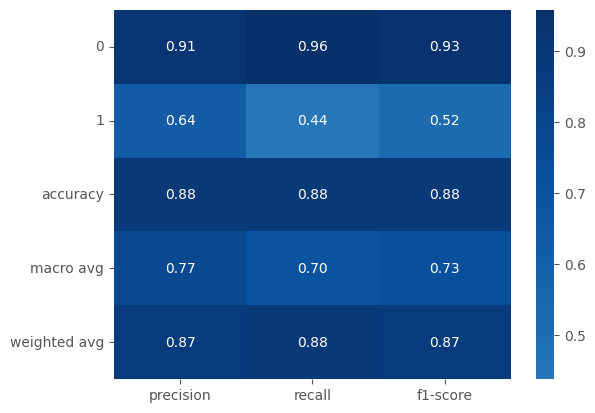

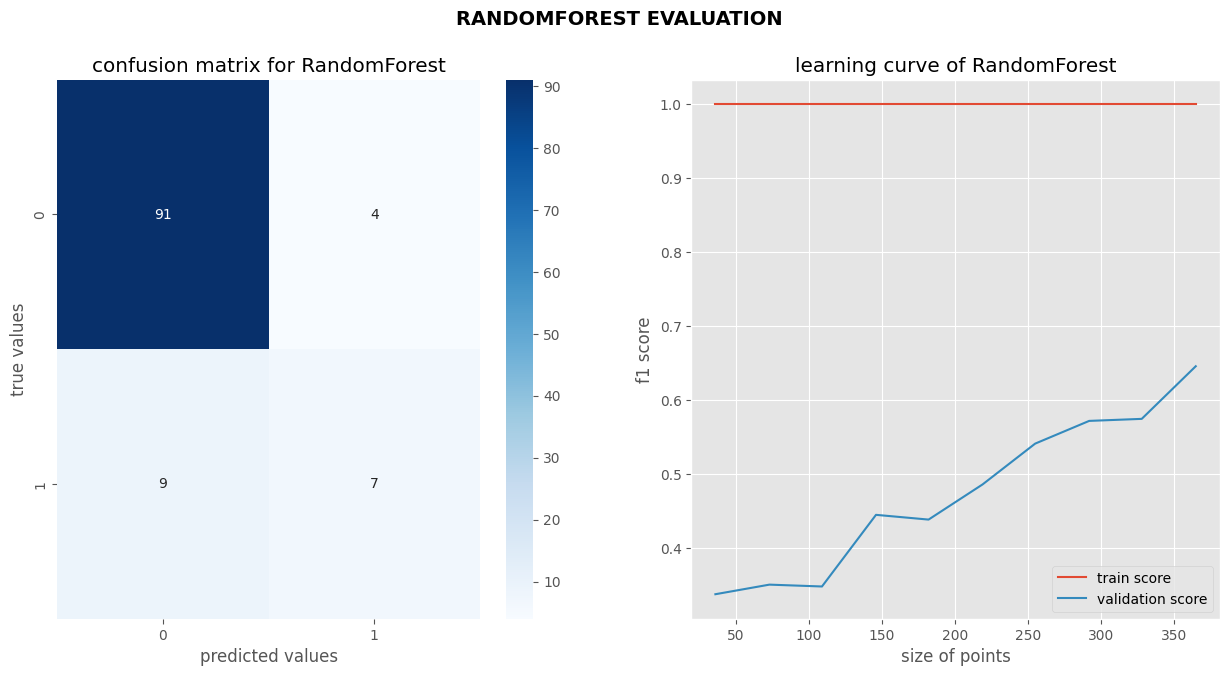

    _       _       ____                  _   
   / \   __| | __ _| __ )  ___   ___  ___| |_ 
  / _ \ / _` |/ _` |  _ \ / _ \ / _ \/ __| __|
 / ___ \ (_| | (_| | |_) | (_) | (_) \__ \ |_ 
/_/   \_\__,_|\__,_|____/ \___/ \___/|___/\__|
                                              



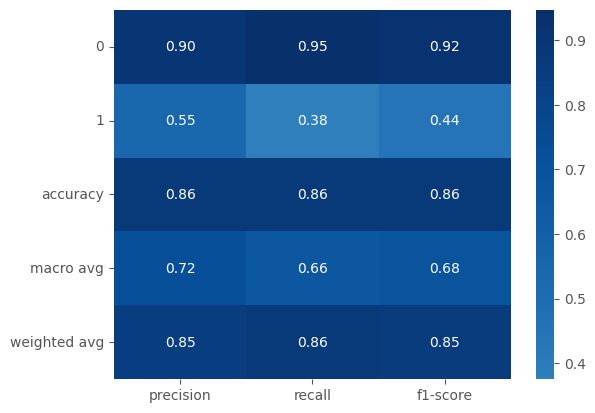

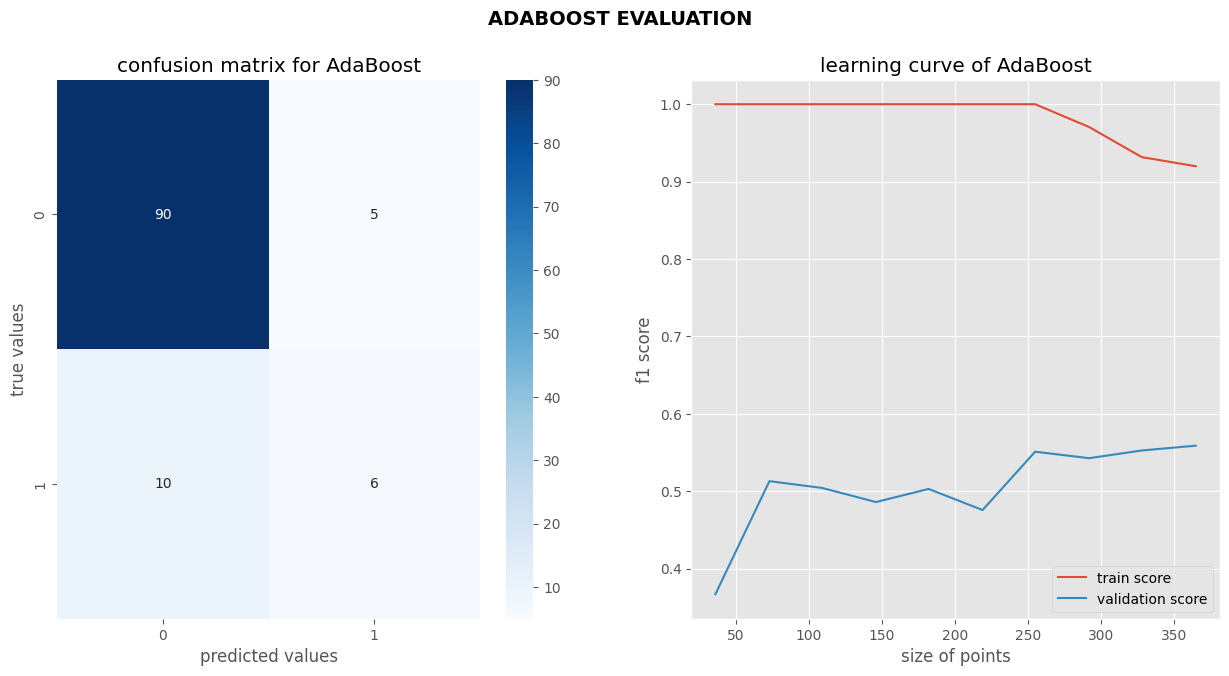

 ______     ____  __ 
/ ___\ \   / /  \/  |
\___ \\ \ / /| |\/| |
 ___) |\ V / | |  | |
|____/  \_/  |_|  |_|
                     



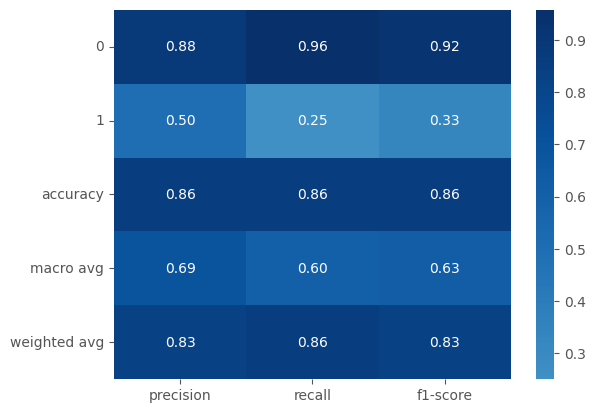

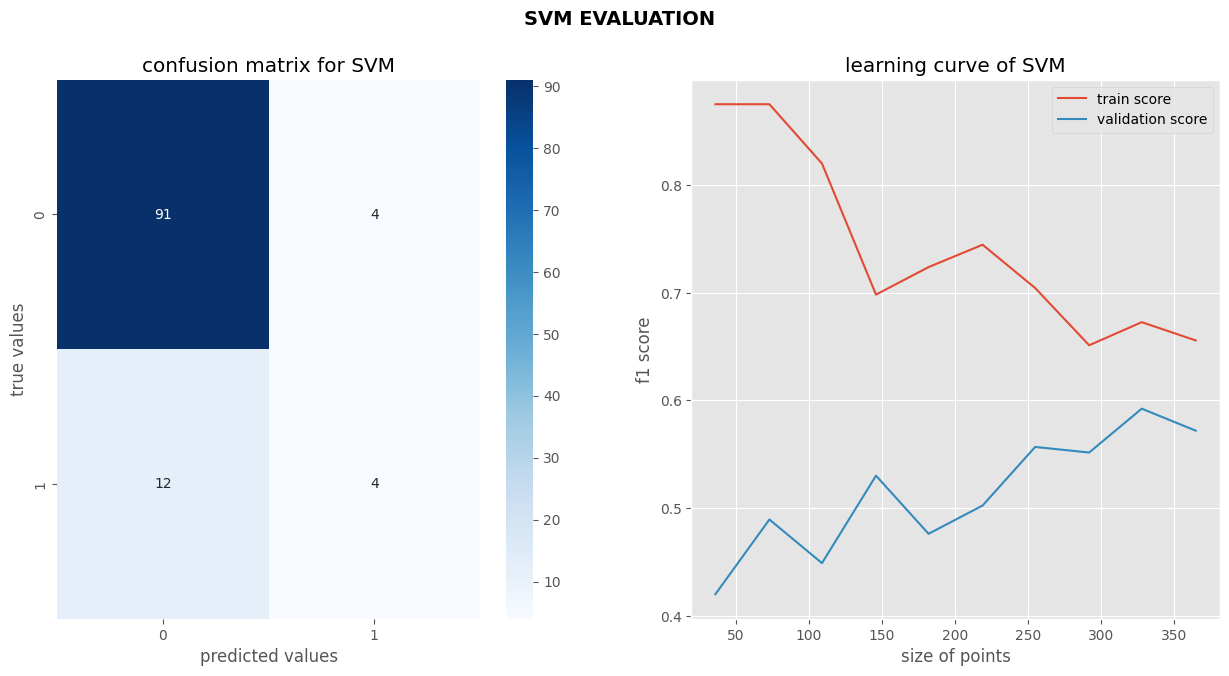

 _  ___   _ _   _ 
| |/ / \ | | \ | |
| ' /|  \| |  \| |
| . \| |\  | |\  |
|_|\_\_| \_|_| \_|
                  



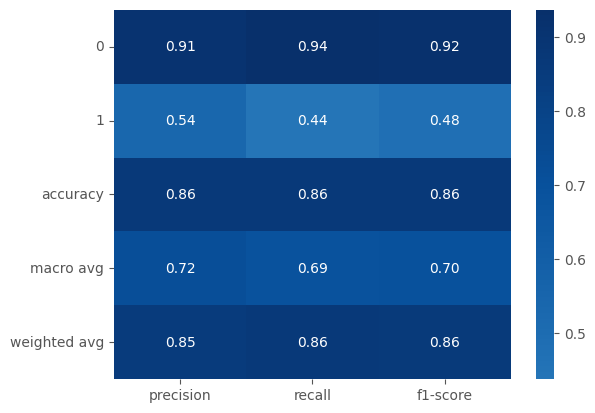

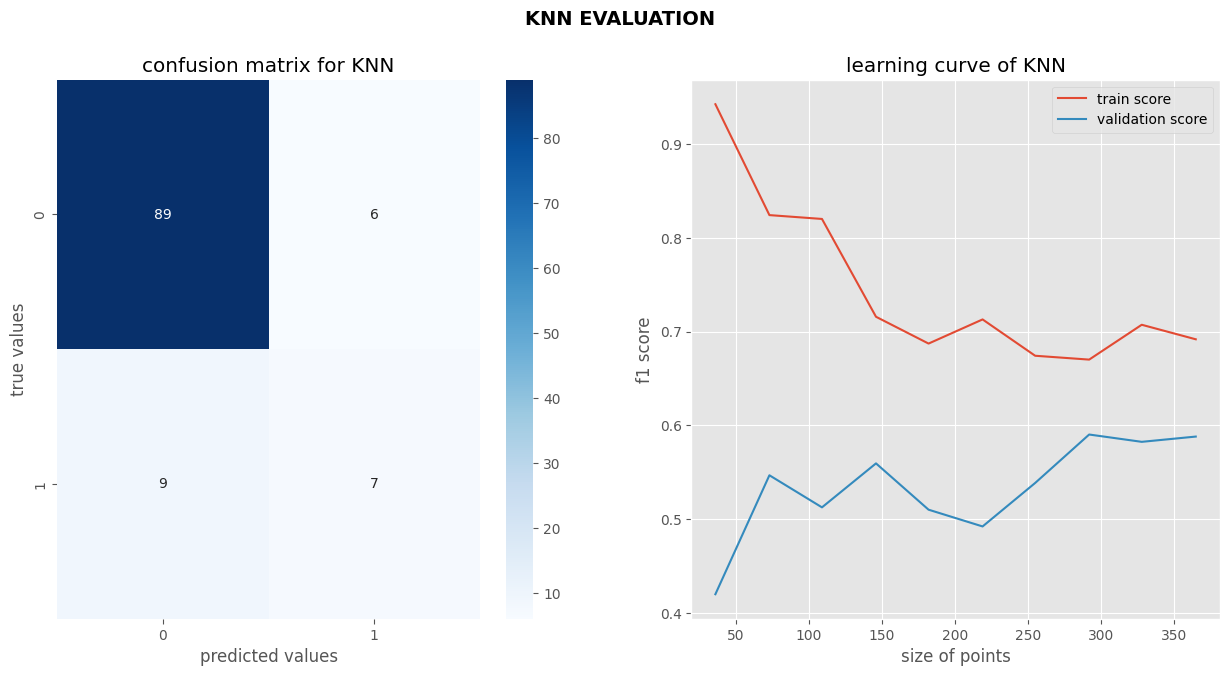

In [33]:
for name,model in list_of_models.items():
    # print(name)
    evaluation(model,name)
    

In [34]:

selected_feature_names =SVM.named_steps['kbest'].get_support()
columns_selected=[]
for col,condition in zip(X_train.columns,selected_feature_names):
    if condition:
        columns_selected.append(col)


print(columns_selected)


['Platelets', 'Leukocytes', 'Eosinophils', 'Monocytes', 'est malade']


### Optimisation with GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
params = {
    'svm__C': [0.1, 1, 10], # regularization parameter
    'svm__gamma': [0.1, 1, 10] # kernel coefficient
}

# Define GridSearchCV object
grid = GridSearchCV(SVM, param_grid=params, cv=5, scoring='recall')

In [37]:
grid.fit(X_train,y_train)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))

Best parameters: {'svm__C': 10, 'svm__gamma': 0.1}
Best score: 0.6461538461538462
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        95
           1       0.64      0.56      0.60        16

    accuracy                           0.89       111
   macro avg       0.79      0.75      0.77       111
weighted avg       0.89      0.89      0.89       111



 _               _                           
| |__   ___  ___| |_     _____   ___ __ ___  
| '_ \ / _ \/ __| __|   / __\ \ / / '_ ` _ \ 
| |_) |  __/\__ \ |_    \__ \\ V /| | | | | |
|_.__/ \___||___/\__|___|___/ \_/ |_| |_| |_|
                   |_____|                   



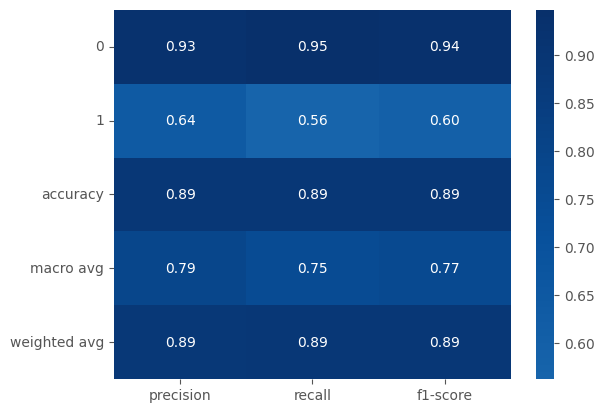

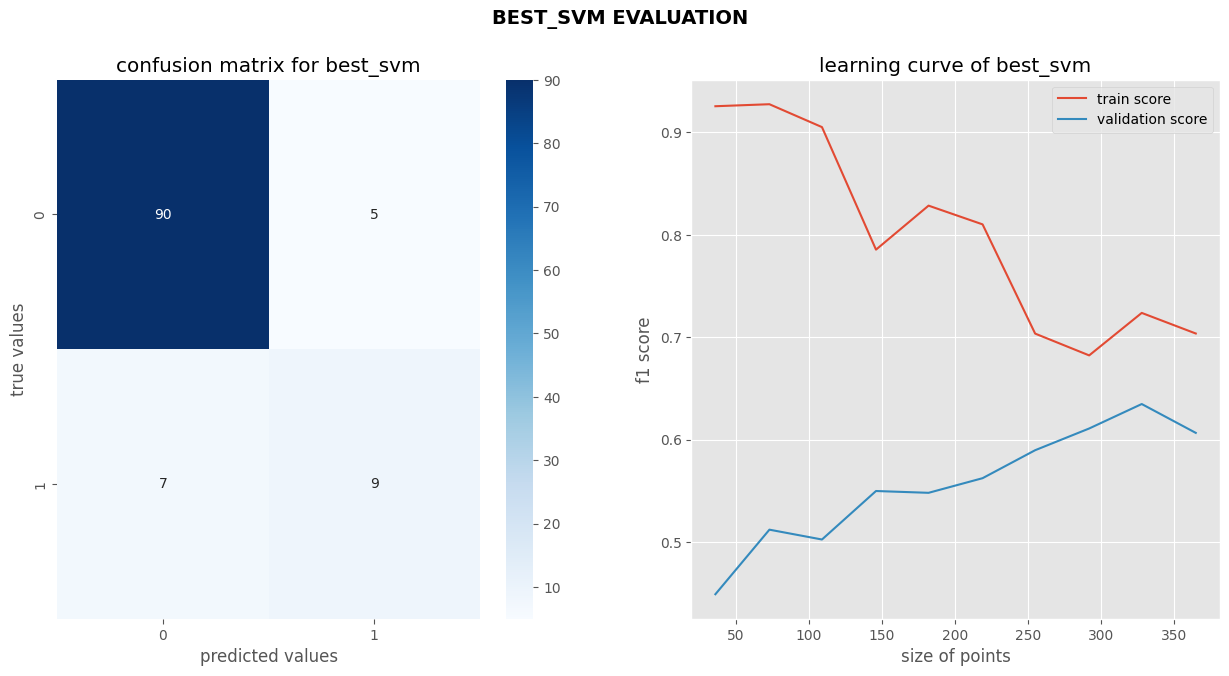

In [38]:
model=grid.best_estimator_
evaluation(model,"best_svm")

In [39]:
from  joblib import dump,load
dump(model,"model")

In [40]:
model=load("model")